<a href="https://colab.research.google.com/github/contandrey/Detec-o_de_fraude_cart-o_de_cr-dito_usando_Scikit_Learn_e_Snap_ML.ipynb/blob/main/C%C3%B3pia_de_Detec%C3%A7%C3%A3o_de_fraude_cart%C3%A3o_de_cr%C3%A9dito_usando_Scikit_Learn_e_Snap_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection Using Scikit-Learn and Snap ML (Evaluating Both Methods)

#Detecção de fraude de cartão de crédito usando Scikit-Learn e Snap ML (Avaliando os dois métodos)

<img src="" width="50%">

Snap ML is a high-performance IBM library for ML modeling. It provides highly efficient CPU/GPU implementations of linear models and decision tree-based models. Snap ML not only accelerates ML algorithms through system recognition, but also delivers new ML algorithms with best-in-class accuracy.

In this project, I consolidate machine learning (ML) modeling skills using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. A real dataset was used to train each of these models. The dataset includes information on credit card transactions carried out in September 2013 by European cardholders. The trained model was used to evaluate whether a credit card transaction is legitimate or not.
______________________________________________________________________________
Snap ML é uma biblioteca IBM de alto desempenho para modelagem de ML. Ele fornece implementações de CPU/GPU altamente eficientes de modelos lineares e modelos baseados em árvore de decisão. O Snap ML não apenas acelera algoritmos de ML por meio do reconhecimento do sistema, mas também oferece novos algoritmos de ML com a melhor precisão da categoria.

Neste projeto, consolido habilidades de modelagem de aprendizado de máquina (ML) usando dois modelos de classificação populares para reconhecer transações fraudulentas de cartão de crédito. Esses modelos são: Árvore de Decisão e Máquina de Vetores de Suporte. Foi usado um conjunto de dados real para treinar cada um desses modelos. O conjunto de dados inclui informações sobre transações realizadas com cartões de crédito em setembro de 2013 por titulares de cartões europeus. Foi utilizado o modelo treinado para avaliar se uma transação com cartão de crédito é legítima ou não.



### All libraries required for this lab are listed below.
________________________________________________________________________________
### Todas as bibliotecas necessárias para este laboratório estão listadas abaixo.

### !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1


Installing the required libraries
________________________________________________________________________________
Instalando as bibliotecas necessárias

In [ ]:
!pip install mamba -qy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
#!pip install pandas==1.3.4
#!pip install numpy==1.21.4
#!pip install seaborn==0.9.0
#!pip install matplotlib==3.5.0
#!pip install scikit-learn==0.20.1

import pandas as pd
import numpy
import seaborn
import matplotlib
!pip install scikit-learn

In [ ]:
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.7 MB/s eta 0:00:00


In [ ]:
# Import the libraries we need to use in this lab
#Importe as bibliotecas que precisamos usar neste laboratório
import warnings
warnings.filterwarnings('ignore')

# from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

###1. Introduction

Imagine you work for a financial institution and part of your job is to build a model that predicts whether a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

As a Data Scientist, you have access to transactions that occurred over a certain period of time. Most transactions are typically legitimate and only a small fraction are illegitimate. So you typically have access to a highly imbalanced dataset. This is also the case in the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class – frauds – represents 0.172% of all transactions).

To train the model you can use part of the input dataset and the remaining data can be used to evaluate the quality of the trained model. First, let's download the dataset.

The dataset is Kaggle's credit card fraud detection dataset.

_______________________________________________________________________________
##Introdução

Imagine que você trabalha para uma instituição financeira e parte do seu trabalho é construir um modelo que preveja se uma transação com cartão de crédito é fraudulenta ou não. Você pode modelar o problema como um problema de classificação binária. Uma transação pertence à classe positiva (1) se for uma fraude, caso contrário pertence à classe negativa (0).

Como Cientista de Dados, você tem acesso às transações que ocorreram durante um determinado período de tempo. A maioria das transações é normalmente legítima e apenas uma pequena fração é ilegítima. Assim, normalmente você tem acesso a um conjunto de dados altamente desequilibrado. Este é também o caso do conjunto de dados atual: apenas 492 transações de 284.807 são fraudulentas (a classe positiva – as fraudes – representa 0,172% de todas as transações).

Para treinar o modelo você pode usar parte do conjunto de dados de entrada e os dados restantes podem ser usados ​​para avaliar a qualidade do modelo treinado. Primeiro, vamos baixar o conjunto de dados.

O conjunto de dados é o conjunto de dados de detecção de fraude de cartão de crédito da Kaggle.

In [ ]:
!pip install skillsnetwork
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0RHPEN/data/creditcard.tgz", overwrite=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Saved to '.'


##2. Dataset analysis

In this section you will read the dataset into a Pandas dataframe and visualize its contents. You will also see some data statistics.

Note: A Pandas dataframe is a two-dimensional, mutable-size, and potentially heterogeneous tabular data structure. For more information click here.
_______________________________________________________________________________
2. Análise de conjunto de dados

Nesta seção você lerá o conjunto de dados em um dataframe do Pandas e visualizará seu conteúdo. Você também verá algumas estatísticas de dados.

Nota: Um dataframe Pandas é uma estrutura de dados tabular bidimensional, de tamanho mutável e potencialmente heterogênea. Para mais informações, clique aqui.

In [ ]:
# read the input data
# lê os dados de entrada
raw_data = pd.read_csv('creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
# exibe as primeiras linhas do conjunto de dados
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###3. In practice, a financial institution can have access to a much larger transaction data set. To simulate such a case, we will inflate the original 10 times.
_______________________________________________________________________________
###Na prática, uma instituição financeira pode ter acesso a um conjunto de dados de transações muito maior. Para simular tal caso, inflaremos o original 10 vezes.

In [ ]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


###4. Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. A variable (the last variable in the table above) is called Class and represents the target variable. Your goal will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

###Note: For confidentiality reasons, the original names of most resources are anonymized as V1, V2.. V28. The values ​​of these features are the result of a PCA transformation and are numeric. The Class feature is the target variable and takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset, visit kaggle.
_______________________________________________________________________________

###Cada linha no conjunto de dados representa uma transação de cartão de crédito. Conforme mostrado acima, cada linha possui 31 variáveis. Uma variável (a última variável na tabela acima) é chamada Classe e representa a variável alvo. Seu objetivo será treinar um modelo que utilize as demais variáveis ​​para prever o valor da variável Class. Vamos primeiro recuperar estatísticas básicas sobre a variável alvo.

###Nota: Por motivos de confidencialidade, os nomes originais da maioria dos recursos são anonimizados como V1, V2 .. V28. Os valores desses recursos são o resultado de uma transformação PCA e são numéricos. A feature Class é a variável alvo e assume dois valores: 1 em caso de fraude e 0 caso contrário. Para obter mais informações sobre o conjunto de dados, visite kaggle.

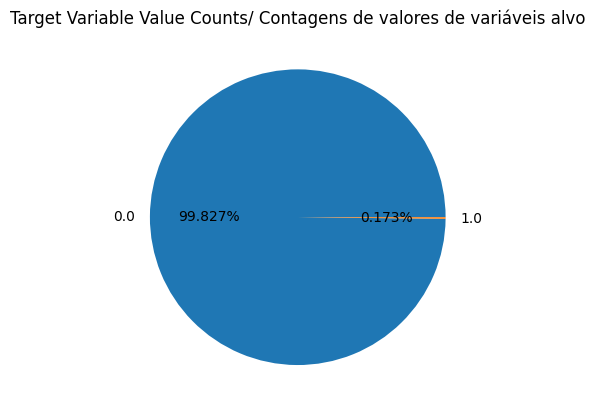

In [ ]:
# get the set of distinct classes
#obtém o conjunto de classes distintas
labels = big_raw_data.Class.unique()

# get the count of each class
#obtém a contagem de cada classe
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
# plota as contagens dos valores da classe
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts' '/ ' 'Contagens de valores de variáveis ​​alvo')
plt.show()

###5. As shown above, the Class variable has two values:

0 (credit card transaction is legitimate)
1 (the credit card transaction is fraudulent)
Therefore, you need to model a binary classification problem. Furthermore, the dataset is highly imbalanced and the target variable classes are not represented equally. This case requires special attention when training or evaluating the quality of a model. One way to deal with this case at training time is to send the model to pay more attention to samples from the minority class. The models in the present study will be configured to take into account the weights of the sample classes at the time of training/adjustment.
________________________________________________________________________________
##Conforme mostrado acima, a variável Class possui dois valores:

0 (a transação com cartão de crédito é legítima)
1 (a transação com cartão de crédito é fraudulenta)
Portanto, você precisa modelar um problema de classificação binária. Além disso, o conjunto de dados é altamente desequilibrado e as classes de variáveis ​​alvo não são representadas igualmente. Este caso requer atenção especial no treinamento ou na avaliação da qualidade de um modelo. Uma forma de lidar com esse caso no momento do treinamento é enviesar o modelo para prestar mais atenção às amostras da classe minoritária. Os modelos do presente estudo serão configurados para levar em consideração os pesos das classes das amostras no momento do treinamento/ajuste.

###6. Practice

Credit card transactions have different values. Let's draw a histogram that shows the distribution of these values? What is the range of these values ​​(min/max)? Could you print the 90th percentile of the value values?
________________________________________________________________________________
###Prática

As transações com cartão de crédito têm valores diferentes. Você poderia traçar um histograma que mostre a distribuição desses valores? Qual é o intervalo desses valores (min/max)? Você poderia imprimir o percentil 90 dos valores?

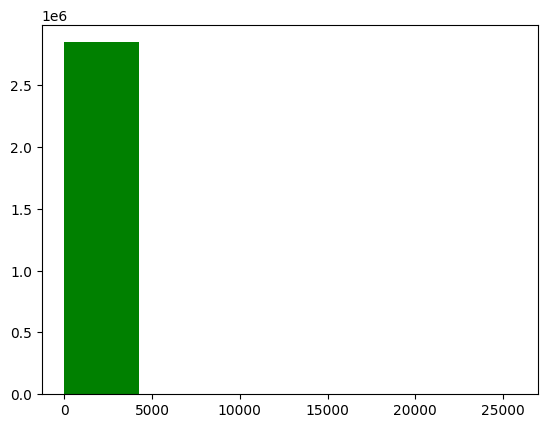

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than/das transações tenham um valor menor ou igual ao  203.0


In [ ]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than/das transações tenham um valor menor ou igual ao ", np.percentile(raw_data.Amount.values, 90))

###7. Dataset preprocessing
Data preprocessing such as scaling/normalization is typically useful for linear models to speed up training convergence. We standardize features by removing the mean and scaling to unit variance.
________________________________________________________________________________
### Pré-processamento de conjunto de dados
O pré-processamento de dados, como dimensionamento/normalização, é normalmente útil para modelos lineares para acelerar a convergência de treinamento. Padronizamos os recursos removendo a média e dimensionando para a variação unitária.

In [ ]:
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


### 8. We are dealing with a large data set, so we need to make sure we don't run out of memory. We can free up the memory occupied by raw_data and big_raw_data as we no longer need them.
________________________________________________________________________________
###Estamos lidando com um grande conjunto de dados, portanto, precisamos ter certeza de que não ficaremos sem memória. Podemos liberar a memória ocupada por raw_data e big_raw_data pois não precisamos mais deles.

In [ ]:
del raw_data
del big_raw_data
gc.collect()

9481

###9. Dataset training/testing split
Now that the dataset is ready to build the classification models, you must first split the preprocessed dataset into a subset to be used to train the model (the training set) and a subset to be used to evaluate the quality of the model (the test suite). to define).

###Divisão de treinamento/teste de conjunto de dados

Agora que o conjunto de dados está pronto para construir os modelos de classificação, você precisa primeiro dividir o conjunto de dados pré-processado em um subconjunto a ser usado para treinar o modelo (o conjunto de treino) e um subconjunto a ser usado para avaliar a qualidade do modelo (o conjunto de teste).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


### 10. Decision trees
Let's first use decision trees for the problem and evaluate the performance of Scikit-learn and Snap ML classifiers.
________________________________________________________________________________
### Árvores de decisão
Vamos primeiro usar árvores de decisão para o problema e avaliar o desempenho dos classificadores do Scikit-learn e Snap ML.

###11. Building a decision tree classifier with Scikit-Learn

We calculate the sample_weights to be used as input to the training routine so that it takes into account the class imbalance present in this dataset.
________________________________________________________________________________
###Construindo um classificador de árvore de decisão com Scikit-Learn

Calculamos os sample_weights a serem usados ​​como entrada para a rotina de treinamento para que ela leve em consideração o desequilíbrio de classe presente neste conjunto de dados.

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

###12. Import the scikit-learn decision tree classifier model:
________________________________________________________________________________
###Importe o modelo do classificador de árvore de decisão do scikit-learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###13. For reproducible output across multiple function calls, set `random_state` to a given integer value:
________________________________________________________________________________
###Para uma saída reproduzível em múltiplas chamadas de função, defina `random_state` para um determinado valor inteiro:

In [ ]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

###14. Train a decision tree classifier using scikit-learn and use the time function to record the training time of our decision tree model.
________________________________________________________________________________
###Treine um classificador de árvore de decisão usando scikit-learn e use a função time para registrar o tempo de treinamento de nosso modelo de árvore de decisão.

In [ ]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  55.89679


###15. Build a Decision Tree Classifier with Snap ML
Let's import the decision tree classifier model from Snap ML. We can reuse the same sample weights that we calculated before using Scikit-learn's compute_sample_weight function to train the Snap ML decision tree. Seamless integration of the Snap ML library is possible due to Scikit-learn Python API compatibility.

Import the Snap ML decision tree classifier model:
###Construa um classificador de árvore de decisão com Snap ML

Vamos importar o modelo classificador de árvore de decisão do Snap ML. Podemos reutilizar os mesmos pesos de amostra que calculamos antes de usar a função compute_sample_weight do Scikit-learn para treinar a árvore de decisão do Snap ML. A integração perfeita da biblioteca Snap ML é possível devido à compatibilidade da API Python Scikit-learn.

Importe o modelo classificador de árvore de decisão do Snap ML:

In [ ]:
from snapml import DecisionTreeClassifier

###16. Build a Decision Tree Classifier with Snap ML
Let's import the decision tree classifier model from Snap ML. We can reuse the same sample weights that we calculated before using Scikit-learn's compute_sample_weight function to train the Snap ML decision tree. Seamless integration of the Snap ML library is possible due to Scikit-learn's Python API compatibility.

Import the Snap ML decision tree classifier model:
________________________________________________________________________________
###Snap ML oferece treinamento de CPU/GPU multithread de árvores de decisão, ao contrário do scikit-learn. Para usar a GPU, defina o parâmetro use_gpu = True:

snapml_dt = DecisionTreeClassifier(max_profundidade=4, random_state=45, use_gpu=True)

Para definir o número de threads de CPU usados ​​no tempo de treinamento, defina o parâmetro n_jobs. Para obter uma saída reproduzível em várias chamadas de função, defina random_state como um determinado valor inteiro.

In [ ]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

###17. Train a Snap ML decision tree classifier and use the time function to record the training time.
________________________________________________________________________________
###Treine um classificador de árvore de decisão do Snap ML e use a função time para registrar o tempo de treinamento.

In [ ]:
# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  6.81576


###18. Evaluate Scikit-Learn and Snap ML Decision Tree Classifiers
Let's look at the Snap ML vs Scikit-Learn training speedup for the decision tree classifier:
________________________________________________________________________________
###Avalie os classificadores de árvore de decisão Scikit-Learn e Snap ML
Vamos examinar a aceleração do treinamento Snap ML vs Scikit-Learn para o classificador de árvore de decisão:

In [ ]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 5.48x 


###19. Let's make inferences on both classifiers and calculate the probabilities of the test samples belonging to the fraudulent transaction class.
________________________________________________________________________________
###Vamos fazer inferências em ambos os classificadores e calcular as probabilidades das amostras de teste pertencentes à classe de transações fraudulentas.

In [ ]:
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

###20. We evaluate the computing area under the receiver operating characteristic curve, the ROC-AUC score of predictions from both classifiers:
________________________________________________________________________________
###Avaliamos a área de computação sob a curva característica de operação do receptor, a pontuação ROC-AUC das previsões de ambos os classificadores:

In [ ]:
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.984
[Snap ML] ROC-AUC score : 0.985


###21. As shown above, both Decision Tree classifiers give the same score on the testing dataset.
However, Snap ML runs the training routine several times faster than Scikit-Learn. This is one of the advantages of using Snap ML: accelerating the training of classic machine learning models, such as linear and tree-based models.

Support Vector Machines We now use Support Vector Machine (SVM) models for the problem and evaluate the performance of the Scikit-learn and Snap ML models.

Build a support vector machine model with Scikit-Learn Import the linear Support Vector Machine (SVM) model from Scikit-Learn:
________________________________________________________________________________
###Conforme mostrado acima, ambos os classificadores da Árvore de Decisão fornecem a mesma pontuação no conjunto de dados de teste.

No entanto, o Snap ML executa a rotina de treinamento várias vezes mais rápido que o Scikit-Learn. Essa é uma das vantagens do uso do Snap ML: aceleração do treinamento de modelos clássicos de aprendizado de máquina, como modelos lineares e baseados em árvore.

Máquinas de vetores de suporte
Agora usamos os modelos Support Vector Machine (SVM) para o problema e avaliamos o desempenho dos modelos do Scikit-learn e Snap ML.

Construa um modelo de máquina de vetores de suporte com Scikit-Learn
Importe o modelo linear Support Vector Machine (SVM) do Scikit-Learn:

In [ ]:
from sklearn.svm import LinearSVC

###22. Instantial an SVM model from scikit-learn. To indicate class imbalance at training time, set class_weight='balanced'.
________________________________________________________________________________
###Instancie um modelo SVM do scikit-learn. Para indicar o desequilíbrio da classe no momento do treinamento, defina class_weight='balanced'.

In [ ]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

##23. Training a linear Support Vector Machine model using Scikit-Learn:
________________________________________________________________________________
###Treinando um modelo linear de Support Vector Machine usando Scikit-Learn:

In [ ]:
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  115.67


###24. Build a support vector machine model with Snap ML
Import the Support Vector Machine (SVM) model from Snap ML:
________________________________________________________________________________
###Construa um modelo de máquina de vetores de suporte com Snap ML
Importe o modelo Support Vector Machine (SVM) do Snap ML:

In [ ]:
from snapml import SupportVectorMachine

###25. In contrast to scikit-learn's LinearSVC, Snap ML offers multithreaded CPU/GPU training of SVMs. To use the GPU, set use_gpu = True. To set the number of threads used at training time, you need to set the n_jobs parameter.
________________________________________________________________________________
###Em contraste com o LinearSVC do scikit-learn, o Snap ML oferece treinamento de CPU/GPU multithread de SVMs. Para usar a GPU, defina use_gpu = True. Para definir o número de threads usados ​​no momento do treinamento, é necessário definir o parâmetro n_jobs.

In [ ]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}


###26. Train an SVM model using Snap ML:
###Treine um modelo SVM usando Snap ML:

In [ ]:
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  19.42


###27. Evaluate Scikit-Learn and Snap ML Support Vector Machine Models
Let's look at Snap ML vs Scikit-Learn training acceleration for SVM models:
________________________________________________________________________________
###Avalie os modelos de máquinas de vetores de suporte Scikit-Learn e Snap ML
Vamos examinar a aceleração do treinamento Snap ML vs Scikit-Learn para os modelos SVM:

In [ ]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.95x 


###28. Let's make inferences on both models and get the confidence scores from the test samples.
________________________________________________________________________________
###Vamos fazer inferências em ambos os modelos e obter as pontuações de confiança das amostras de teste.

In [ ]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

###29. Evaluating the ROC-AUC score of predictions from both models:
________________________________________________________________________________
###Avaliando a pontuação ROC-AUC das previsões de ambos os modelos:


In [ ]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


###30. As shown above, both SVM models give the same score on the test dataset. However, as in the case of Decision Trees, Snap ML runs the training routine faster than Scikit-Learn. For more Snap ML examples, visit here.

###Additionally, as shown above, Snap ML not only apparently speeds up scikit-learn applications, but the library's Python API also supports scikit-learn metrics and data preprocessors.
_______________________________________________________________________________
###Conforme mostrado acima, ambos os modelos SVM fornecem a mesma pontuação no conjunto de dados de teste. Porém, como no caso das Árvores de Decisão, o Snap ML executa a rotina de treinamento mais rapidamente que o Scikit-Learn. Para mais exemplos de Snap ML, visite aqui.

###Além disso, como mostrado acima, o Snap ML não apenas acelera aparentemente os aplicativos scikit-learn, mas a API Python da biblioteca também é compatível com métricas e pré-processadores de dados do scikit-learn.

###31. Practice

-Running inference on the test suite using Scikit-Learn and Snap ML models.

-Assessing the quality of the above trained SVM models using the hinge loss metric.

-Calculating and printing the hinge loss metric for both sets of predictions (both models should provide similar hinge loss).
________________________________________________________________________________
###Prática

-Executando a inferência no conjunto de testes usando os modelos Scikit-Learn e Snap ML.

-Avaliando a qualidade dos modelos SVM treinados acima usando a métrica de perda de dobradiça.

-Calculando e imprimindo a métrica de perda de dobradiça para ambos os conjuntos de previsões (os dois modelos devem fornecer perda de dobradiça semelhante).

In [ ]:
from sklearn.metrics import hinge_loss


In [ ]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# evaluate the hinge loss metric for Sklearn
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_sklearn))

# evaluate the hinge loss for Snap ML
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

[Scikit-Learn] Hinge loss:   0.234
[Snap ML] Hinge loss:   0.228
